In [126]:
from itertools import accumulate
import matplotlib.pyplot as plt
from math import log,sqrt
from scipy.stats import norm
from statistics import mean,variance
import numpy as np
from scipy.stats import norm,median_abs_deviation,chi2

In [2]:
class sumstats :
    def __init__(self,X) :
        self.X = X
        self.SX = [0] + list(accumulate(X))
        self.SXX = [0] + list(accumulate([x*x for x in X]))
        

In [3]:
class normal_mean :
    def __init__(self,X) :
        self.sumstats = sumstats(X)
    def __call__(self,i,j) :
        result = []
        for start in  range(j+1) :
            val = self.sumstats.SX[j+1] - self.sumstats.SX[start]
            val *= val
            val /= (j - start + 1)
            val = -val
            val += self.sumstats.SXX[j+1] - self.sumstats.SXX[start]
            result.append(val)
        return result

In [63]:
class normal_mean :
    def __init__(self,X) :
        self.sumstats = sumstats(X)
    def __call__(self,i,j) :
        val = self.sumstats.SX[j+1] - self.sumstats.SX[i]
        val *= val
        val /= (j - i + 1)
        val = -val
        val += self.sumstats.SXX[j+1] - self.sumstats.SXX[i]
        return val

In [145]:
def sop(S) :
    p_cost = [S.F[i] + S.cost(i,S.R[-1]) + S.beta for i in S.R]
    min_p_cost = min(p_cost)
    S.F.append(min_p_cost)
    S.cpts.append(S.R[-1] - S.R[p_cost.index(min_p_cost)] + 1)
    # S.R = S.R + [len(S.F)-1]
    # S.R = [r for r in S.R if S.F[r] + S.cost(r,S.R[-1]) <= S.F[-1] + S.beta]
    return S

In [146]:
def prune(S) :
    S.R = [r for r in S.R if S.F[r] + S.cost(r,S.R[-1]) <= S.F[-1] + S.beta]
    return S 

In [38]:
class state :
    def __init__(self,X,cost,beta) :
        self.n = len(X) 
        self.cost = cost(X)
        self.beta = beta
        self.F = [-beta]
        self.cpts = [0]
        self.R = [0]

In [116]:
def changepoints(S) :
    locations = [len(S.cpts) - 1]
    while locations[0] - S.cpts[locations[0]] - 1 > 0 :
        locations.insert(0,locations[0] - S.cpts[locations[0]] - 1)
    return locations

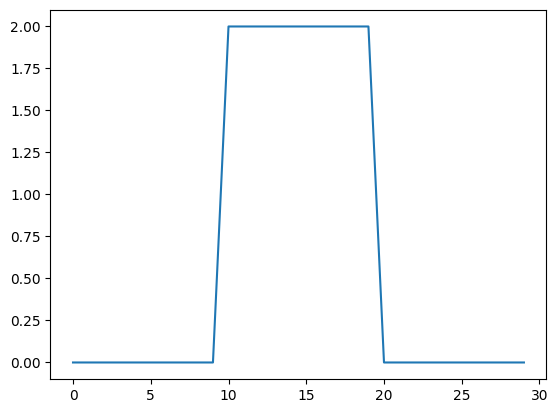

In [104]:
Z = [0 for i in range(10)] + [2 for i in range(10)]  + [0 for i in range(10)]
plt.plot(Z)
plt.show()

In [149]:
S = state(Z,normal_mean,2*log(len(Z)))
for i in range(S.n-1) :
    S.R = S.R + [i]
    S = sop(S)
    S = prune(S)
print(S.cpts)
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3, 4, 5, 6, 7, 8, 9]


In [150]:
changepoints(S)

[9, 19, 29]

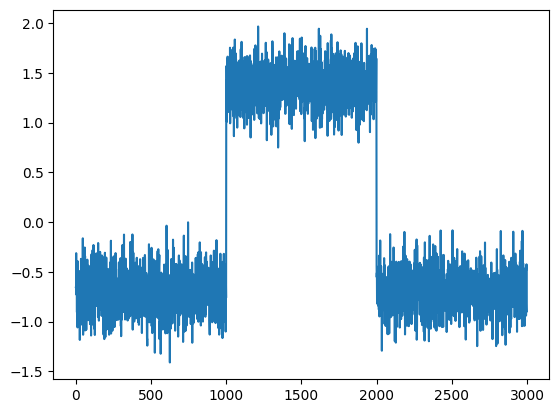

In [12]:
X = [0 for i in range(1000)] + [10 for i in range(1000)] + [0 for i in range(1000)]
E = norm.rvs(size=3000)
Z = [x+e for x,e in zip(X,E)]
mu = mean(Z)
sigma = sqrt(variance(Z))
Z = [(z-mu)/sigma for z in Z]
plt.plot(Z)
plt.show()

In [14]:
S = state(Z,normal_mean,2*log(len(Z)))
for i in range(S.n-1) :
    S = op(S)
changepoints(S)

[999, 1999, 2999]

In [26]:
x = [1,2,3,4]

In [27]:
x[-1]

4

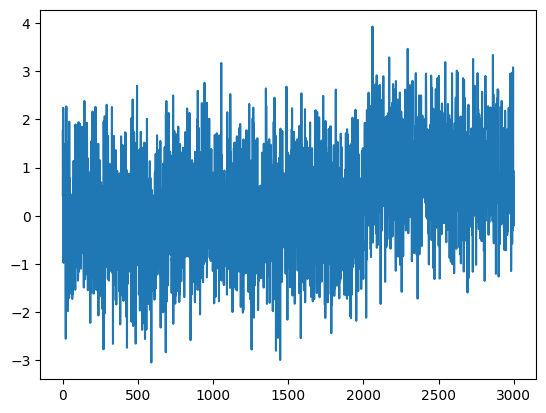

In [151]:
np.random.seed(0)
X = [0.0 for i in range(2000)] + [1.0 for i in range(1000)]
E = norm.rvs(size=len(X))
X = [x+e for x,e in zip(X,E)]
plt.plot(X)
plt.show()

In [142]:
S = state(X,normal_mean,2*log(len(X)))
for i in range(S.n-1) :
    S = sop(S)

In [154]:
S = state(X,normal_mean,2*log(len(X)))
for i in range(S.n-1) :
    S.R = S.R + [i]
    S = sop(S)
    S = prune(S)

In [155]:
changepoints(S)

[2001, 2999]

In [158]:
def pelt_norm_mean(X,beta) :
    S = state(X,normal_mean,2*log(len(X)))
    for i in range(S.n-1) :
        S.R = S.R + [i]
        S = sop(S)
        S = prune(S)
    return changepoints(S)
    

In [159]:
pelt_norm_mean(X,2*log(len(X)))

[2001, 2999]